### Train the spam classifier model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from lime.lime_text import LimeTextExplainer

# Download and load the spam/ham dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Preprocess the data
X = df['message']
y = df['label'].map({'ham': 0, 'spam': 1})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Evaluate the classifier
y_pred = classifier.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classifier accuracy: {accuracy:.2f}")

Classifier accuracy: 0.97


### Load LIME Text Explainer

In [11]:
# Create a LIME explainer
explainer = LimeTextExplainer(class_names=['ham', 'spam'])

# Function to predict probabilities
def predict_proba(texts):
    return classifier.predict_proba(vectorizer.transform(texts))


### Select text you want to generate the explanation for


Explanation for instance: You have been awarded a free free free 5000$ coupon for a cruise!

Top features contributing to the classification:
awarded: 0.2261
5000: 0.1921
free: 0.1222
You: -0.0618
have: -0.0551
been: -0.0381
for: -0.0364
cruise: 0.0075
coupon: 0.0007
a: 0.0001

LIME explanation saved as HTML file at: ./explanation/text_explanation.html


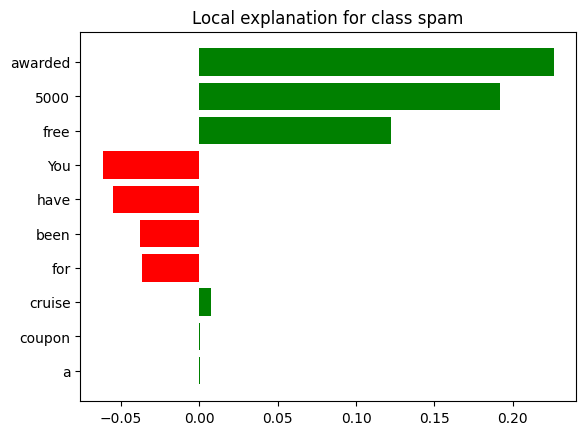

In [13]:
text_instance = "You have been awarded a free free free 5000$ coupon for a cruise!"

# Generate the explanation
explanation = explainer.explain_instance(text_instance, predict_proba, num_features=10)

# Print the explanation
print(f"\nExplanation for instance: {text_instance}")
print("\nTop features contributing to the classification:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight:.4f}")
# Save the LIME explanation as an HTML file
html_explanation = explanation.as_html()
output_path = "./explanation/text_explanation.html"

with open(output_path, "w", encoding="utf-8") as f:
    f.write(html_explanation)

print(f"\nLIME explanation saved as HTML file at: {output_path}")

# Visualize the explanation
explanation.as_pyplot_figure().show()

### check more results on explanation/text_explanation.html